# Single Layer Perceptron für 2D data

In [2]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

## Trainingsaufgabe definieren

Erstellen Sie einen Datensatz mit der Sklearn datenset Bibliothek
   Mit 'make_blobs' können Sie zwei Daten-Cluster erzeugen; 
   wählen Sie eine geeignete cluster_std, um die Cluster mit einem Single Layer Perceptron linear trennen zu können

In [4]:
X, y = datasets.make_blobs()

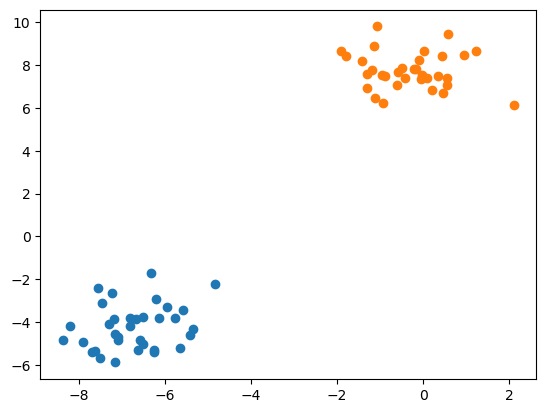

In [5]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    
scatter_plot() 

## Was brauchen wir, um eine SLP zu modellieren?

- Instanzen (x_data) und Ziele (y_data) 
- 2 Gewichte (w)
- 1 Bias(b)
- Netzeingangsfunktion
- Aktivierungsfunktion
- Fehler- oder Lossfunktion

Erstellen Sie einen SLP-Klassifikator mit Hilfe der Pytorch-Bibliothek

* wenn Sie nicht die 'parameters()'-Funktion von Torch verwenden, stellen Sie sicher, dass Sie die automatische Differenzierung mit 'EXAMPLETENSOR.requires_grad = True' aktivieren

In [18]:
#Als Vorschlag:
class SLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(SLP, self).__init__()
        
        self.activation_function = nn.ReLU()
        
        self.linear1 = nn.Linear(input_size, 3)
        self.linear2 = nn.Linear(3, 2)
        self.linear3 = nn.Linear(2, output_size)

    def forward(self, x): #wie Wert propagieren
        
        out_layer_1 = self.activation_function(self.linear1(x))
        out_layer_2 = self.activation_function(self.linear2(out_layer_1))
        out_layer_3 = self.activation_function(self.linear3(out_layer_2))
        
        return out_layer_3
        
    def predict(self, x):           #Klassifizierung zweier Klassen
        pass

In [23]:
slpModel = SLP(2,2)
torch_data = torch.tensor(X).float()
slpModel(torch_data)

tensor([[0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1385, 0.3498],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1388, 0.3494],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1391, 0.3491],
        [0.1405, 0.3472],
        [0.1395, 0.3485],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1405, 0.3472],
        [0.1

In [33]:
torch.manual_seed(2)     #to generate reproducible outputs

model = SLP(input_size=X.shape[1], output_size=3) # model = SLP(input_size=2, output_size=1)

[w, b] = model.parameters()
w1, w2 = w.view(2)

print(list(model.parameters()))


def get_params():
    return (w1.item(), w2.item(), b[0].item())


ValueError: too many values to unpack (expected 2)

In [ ]:
#Als Vorschlag:
def plot_fit(title):
    plt.title=(title)
    w1, w2, b1 = get_params()
    x1 = torch.tensor([-2, 2])
    x2 = (w1*x1 + b1)/(-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()
    plt.show()

In [ ]:
plot_fit('Initial Model')

## Das Modell trainieren


Verwenden Sie die Pytorch-Bibliothek 
* wählen Sie eine geeignete Loss/Fehler-Funktion
* wählen Sie einen geeigneten Optimierer


In [47]:
#Als Vorschlag
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [48]:
#Als Vorschlag
epochs = 100
losses = []

for i in range(epochs):
    X_full_batch = torch.tensor(X).float()
    y_full_batch = torch.tensor(y, dtype = torch.long)
    
    y_pred = model(X_full_batch)
    #Ausgabe für x_data schätzen
    
    loss = criterion(y_pred, y_full_batch)
    #den Fehler zwischen Schätzung und Label berechnen
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print("epoch:", i, "loss:", loss.item())
    
                     #Loss an Lossliste anhängen
                     #Resete die Gradienten des Optimierers
                     #Berechne die Gradienten der Modellparameter
                     #Aktualisierung der Gewichte 

epoch: 0 loss: 1.0985221862792969
epoch: 1 loss: 1.0985220670700073
epoch: 2 loss: 1.0985217094421387
epoch: 3 loss: 1.0985217094421387
epoch: 4 loss: 1.0985214710235596
epoch: 5 loss: 1.0985212326049805
epoch: 6 loss: 1.098521113395691
epoch: 7 loss: 1.0985207557678223
epoch: 8 loss: 1.0985206365585327
epoch: 9 loss: 1.0985205173492432
epoch: 10 loss: 1.0985203981399536
epoch: 11 loss: 1.0985199213027954
epoch: 12 loss: 1.0985199213027954
epoch: 13 loss: 1.0985198020935059
epoch: 14 loss: 1.0985198020935059
epoch: 15 loss: 1.0985194444656372
epoch: 16 loss: 1.0985193252563477
epoch: 17 loss: 1.098519206047058
epoch: 18 loss: 1.0985190868377686
epoch: 19 loss: 1.0985188484191895
epoch: 20 loss: 1.0985187292099
epoch: 21 loss: 1.0985187292099
epoch: 22 loss: 1.0985184907913208
epoch: 23 loss: 1.0985184907913208
epoch: 24 loss: 1.0985182523727417
epoch: 25 loss: 1.0985180139541626
epoch: 26 loss: 1.0985180139541626
epoch: 27 loss: 1.0985177755355835
epoch: 28 loss: 1.098517656326294
epoc

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

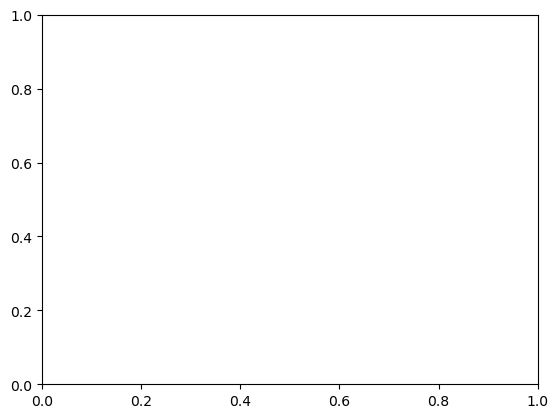

In [44]:
#Als Vorschlag
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

In [ ]:
plot_fit("Trained Model")

## Testen Sie das Modell

* zwei zusätzliche Punkte generieren und das Modell damit testen
* zeichnen Sie diese Punkte in die Grafik ein

In [ ]:
#Als Vorschlag


point1 = 
point2 =
plt.plot(point1[0], point1[1], 'gx')
plt.plot(point2[0], point2[1], 'mx')
plot_fit("Trained Model")
print("Green point positive probability = {}".format() 
print("Purple point positive probability = {}".format() 
print("Green point belongs in class {}".format() 
print("Pruple point belongs in class = {}".format() 